<a href="https://colab.research.google.com/github/Salah-Mo-hammed/Prediction_of_Product_Sales/blob/main/Mock_Belt_Exam_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mock Exam Fish (Regression)

In [ ]:
# import basic libraires
from sklearn import set_config
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import preproccesing libraries
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
# import models , metrices ,and GridSearchCv
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error ,root_mean_squared_error
from sklearn.model_selection import GridSearchCV

set_config(transform_output='pandas')

In [ ]:
fpath='/content/drive/MyDrive/AXSOSACADEMY/AXSOSACADEMY/02-IntroML/Week07/Data/Fish.csv'
fishDf=pd.read_csv(fpath)
fishDf.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


## data cleaning

In [ ]:
print(f'duplicates = {fishDf.duplicated().sum()}') # zero duplicates

print(f'nulls = {fishDf.isna().sum().sum()}') # 22 nulls

duplicates = 0
nulls = 22


In [ ]:
#  see the nans (this isn't important move so skip it)
nans=fishDf[fishDf.isnull().any(axis=1)] # this code from chatgpt
nans.head(20) # some rows have more than 1 nan
#

,Species,Weight,Length1,Length2,Length3,Height,Width
10,Bream,475.0,28.4,31.0,36.2,14.2628,NaN
17,Bream,700.0,30.4,33.0,38.5,NaN,5.1975
26,Bream,720.0,32.0,35.0,40.6,NaN,6.0900
37,Roach,78.0,17.5,18.8,21.2,NaN,2.9044
44,Roach,145.0,20.5,22.0,NaN,6.6339,3.5478
46,NaN,140.0,21.0,22.5,25.0,6.5500,3.3250
48,Roach,169.0,22.0,24.0,27.2,7.5344,NaN
72,Perch,5.9,7.5,8.4,NaN,2.1120,1.4080
74,Perch,40.0,13.8,15.0,NaN,3.8240,2.4320
77,NaN,100.0,16.2,18.0,19.2,5.2224,3.3216


In [ ]:
cat_types=fishDf.select_dtypes('object').columns
cat_types # Species
# fishDf['Species'].value_counts() # searched for beam and bream , inconsistancy
fishDf['Species']=fishDf['Species'].str.replace('Beam','Bream') # there is an issue with the code (shows 2 different Breams even after replace )
fishDf['Species'].value_counts()

,count
Species,
Perch,53
Bream,35
Roach,19
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [ ]:
# fill Nans for cats

print('cats\n')
print(fishDf[cat_types].isna().sum())
fishDf['Species']=fishDf['Species'].fillna("MissingValue")
print(fishDf[cat_types].isna().sum())

# fill Nans for nums

print('\nnums\n')
num_type=fishDf.select_dtypes('number').columns
print(fishDf[num_type].isna().sum())
fishDf[num_type]=fishDf[num_type].fillna(-1)
print(fishDf[num_type].isna().sum())

cats

Species    4
dtype: int64
Species    0
dtype: int64

nums

Weight     0
Length1    2
Length2    2
Length3    9
Height     3
Width      2
dtype: int64
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [ ]:
# check consistancy for nums
fishDf.describe()
#  no inconsistancy here to
## data here is cleaned

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,25.739623,27.801258,29.373585,8.720205,4.348684
std,357.978317,10.329876,10.843017,13.088315,4.421762,1.789846
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,120.000000,19.000000,20.900000,22.500000,5.896250,3.338300
50%,273.000000,25.000000,26.500000,28.900000,7.615600,4.247600
75%,650.000000,32.250000,35.000000,39.350000,11.930700,5.584500
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


## Visualizations

### EDA Functions

In [ ]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y,
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax,scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

### Univariate:

/tmp/ipython-input-39-1613442045.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


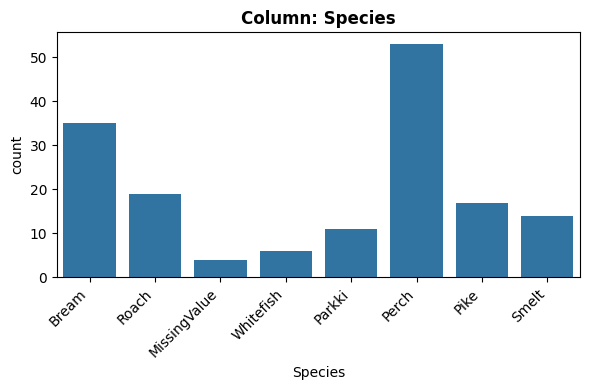

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: 'Perch' occurs 53 times (33.33%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Species'}, xlabel='Species', ylabel='count'>)

In [ ]:
target='Species'
explore_categorical(fishDf,target,fillna = False)
#  plot for the only cat feature
#  highest number of fishes is Perches , (number of catched fishes , or more demand , i dont know this data about what)

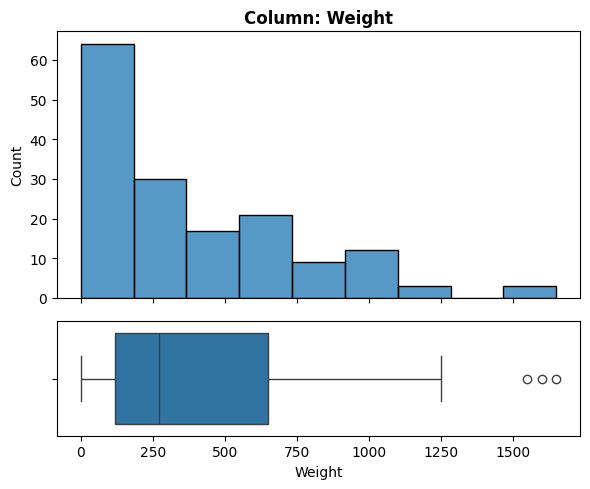

- NaN's Found: 0 (0.0%)
- Unique Values: 101
- Most common value: '300.0' occurs 6 times (3.77%)
- Not constant or quasi-constant.


(<Figure size 600x500 with 2 Axes>,
 array([<Axes: title={'center': 'Column: Weight'}, xlabel='Weight', ylabel='Count'>,
        <Axes: xlabel='Weight'>], dtype=object))

In [ ]:
target='Weight'
explore_numeric(fishDf,target)
# from histplot

# most fish have low weights (near to 0-250 gram) > 60 fish
# we can say that most fish are light ,and few are heavy , so it's right skwed
# histogram shows most frequent range is 0-250 (mode)

# from boxplot
# median 250-300 ,so 50% of fishes are lower 250-300 grams ,and 50% grater then 250-300 g


**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



### Multivariate:

/tmp/ipython-input-40-1167870371.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Species vs. Weight'}, xlabel='Species', ylabel='Weight'>)

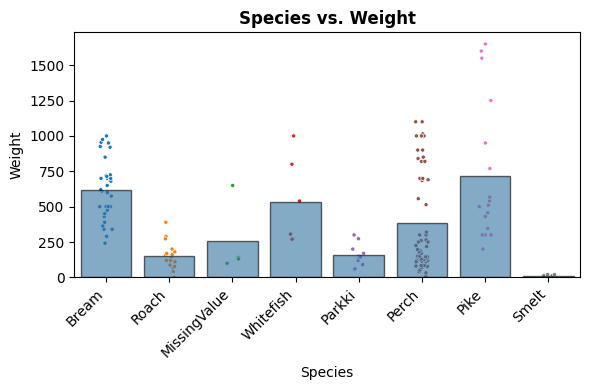

In [ ]:
feature='Species'
plot_categorical_vs_target(fishDf,feature,'Weight' )
# remmeber , blue bars are rhe mean wieght (y-axsis) of evry fish type (x-axsis)
# colored points are the stripplots ,represent each data point (imortant for clarrifiying inner distribution)
# in stripplots ,look and ask , are they close to each other or far away from each other , is there outliers

# let's explain
#  Breams and pikes are the highests ,unlike  smelt and roach
# in pike we can see that the stripplorts are more far away from each other (highr distribuation)
# there is some outliers in pike
# final report:
#  Breams has the highest concetraction of heavy fishes
# roaches are the smallest avg wieght

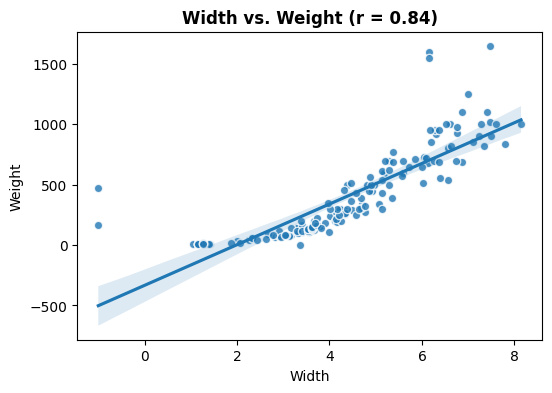

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Width vs. Weight (r = 0.84)'}, xlabel='Width', ylabel='Weight'>)

In [ ]:
feature='Width'
plot_numeric_vs_target(fishDf,feature,'Weight')
# we can see that more the width increse , more the Weight increase too
# concteraction of data points are in the  2-4 width , their weights are nearky 100-250

## preproccessing data

In [ ]:
y=fishDf['Weight']
X=fishDf.drop(columns=['Weight','Species'],axis=1)
# we can also discard Species due to it's cat ,
# but note that species also can enhance the accuracy (including Species can improve model accuracy)
# Different species have different typical shapes and weight-length relationships!!.

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
# split data for training and testing data , random_state just to show the same values evry time we split


In [ ]:
# preproccess num cols
num_cols=X_train.select_dtypes('number').columns
impute_mean=SimpleImputer(strategy='median') # mean is also ok ,due to we are talikng about fish length ,width , hieght ,so propability for outliers is small
scale=StandardScaler() # to standarize the date , so the model won't tend to some features because of her big numbers (numbers larger than other features)
num_pipe=make_pipeline(impute_mean,scale)
num_tuple=('Numerical',num_pipe,num_cols)

# preproccess cat col
cat_cols=X_train.select_dtypes('object').columns
impute_NA=SimpleImputer(strategy='constant',fill_value='Missing')
ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore')
cat_pipe=make_pipeline(impute_NA,ohe)
cat_tuple=('Categorical',cat_pipe,cat_cols)


In [ ]:
preproccessor=ColumnTransformer([num_tuple,cat_tuple],verbose_feature_names_out=False)
preproccessor

# we can use this here (old way) ,but it will be better
# preproccessor.fit(X_train)
# X_train_processed=preproccessor.transform(X_train)
# X_test_processed=preproccessor.transform(X_test)

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='Missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index([], dtype='object'))],
                  verbose_feature_names_out=False)

### regression metrices mehtod

In [ ]:
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = root_mean_squared_error(y_true, y_pred)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

### Model : Linear regression

In [ ]:
lin_reg=LinearRegression()
lin_reg_pipe=make_pipeline(preproccessor,lin_reg)
lin_reg_pipe.fit(X_train,y_train)
lin_reg_pipe
print(lin_reg.intercept_)
print(lin_reg.coef_)


393.2722689075631
[224.32233426  20.13588547 -16.54631965  36.17869514  88.83576419]


In [ ]:
lin_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                      

In [ ]:
param_grid = {
    'linearregression__fit_intercept': [True, False],
    'linearregression__positive': [True, False]
}
grid_search_lin = GridSearchCV(lin_reg_pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lin.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Numerical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                                                        ('Categorical',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(f...='Missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index([], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# to show them together !!
# this next method shwos befor making grid search
print("******************** before grid search cv ************************* \n")
evaluate_regression(lin_reg_pipe,X_train,y_train,X_test,y_test)
# this next method shwos after making grid search
print("//////////////////////////////////////////////////////////////////////////////////////////////\n")
print("******************** after grid search cv ************************* \n")
evaluate_regression(grid_search_lin,X_train,y_train,X_test,y_test)
print("//////////////////////////////////////////////////////////////////////////////////////////////\n")
# best_estimator_ is the same as the above method(the grid_search_lin) shows the same values
#  you can use any one
best_model=grid_search_lin.best_estimator_ #
evaluate_regression(best_model,X_train,y_train,X_test,y_test)

//////////////////////////////////////////////////////////////////////////////////////////////

******************** after grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 105.993
- MSE = 19,811.538
- RMSE = 140.753
- R^2 = 0.843

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 110.993
- MSE = 27,007.099
- RMSE = 164.338
- R^2 = 0.793
//////////////////////////////////////////////////////////////////////////////////////////////

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 105.993
- MSE = 19,811.538
- RMSE = 140.753
- R^2 = 0.843

------------------------------------------------------------
Regression Me

### Model : Desicion tree  regressor (Regression Tree)

In [ ]:
dec_tree_reg=DecisionTreeRegressor(random_state=42)
dec_tree_reg_pipe=make_pipeline(preproccessor,dec_tree_reg)
dec_tree_reg_pipe.fit(X_train,y_train)
dec_tree_reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [ ]:
dec_tree_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                      

In [ ]:
grid_params = {
    'decisiontreeregressor__max_depth': [None, 10, 20, 30],
    'decisiontreeregressor__min_samples_split': [2, 5, 10],}
#  note here : take a look and try any thing else in param grid
grid_search_reg_tree=GridSearchCV(dec_tree_reg_pipe,grid_params,cv=5,scoring='neg_mean_squared_error')
grid_search_reg_tree.fit(X_train,y_train)
best_dec_tree_model=grid_search_reg_tree.best_estimator_

In [ ]:
print("******************** before grid search cv ************************* \n")
evaluate_regression(dec_tree_reg_pipe,X_train,y_train,X_test,y_test)
print("//////////////////////////////////////////////////////////////////////////////////////////////\n")
print("******************** after grid search cv ************************* \n")
evaluate_regression(best_dec_tree_model,X_train,y_train,X_test,y_test)

******************** before grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 0.420
- MSE = 10.504
- RMSE = 3.241
- R^2 = 1.000

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 58.533
- MSE = 10,201.766
- RMSE = 101.004
- R^2 = 0.922
//////////////////////////////////////////////////////////////////////////////////////////////

******************** after grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 19.837
- MSE = 910.951
- RMSE = 30.182
- R^2 = 0.993

------------------------------------------------------------
Regression Metrics: Test Data
----------------------

### Model : Baggiing regressor

In [ ]:
bagg_reg=BaggingRegressor(random_state=42)
bagg_reg_pipe=make_pipeline(preproccessor,bagg_reg)
bagg_reg_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [ ]:
bagg_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                      

In [ ]:
grid_params = {
    'baggingregressor__n_estimators': [50, 100,]}
grid_search_bagg=GridSearchCV(bagg_reg_pipe,grid_params,cv=5,scoring='neg_mean_squared_error')
grid_search_bagg.fit(X_train,y_train)
best_bagg_model=grid_search_bagg.best_estimator_

In [ ]:
print("******************** before grid search cv ************************* \n")
evaluate_regression(bagg_reg_pipe,X_train,y_train,X_test,y_test)
print("//////////////////////////////////////////////////////////////////////////////////////////////\n")
print("******************** after grid search cv ************************* \n")
evaluate_regression(best_bagg_model,X_train,y_train,X_test,y_test)

******************** before grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 19.975
- MSE = 1,943.763
- RMSE = 44.088
- R^2 = 0.985

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 46.190
- MSE = 6,621.617
- RMSE = 81.373
- R^2 = 0.949
//////////////////////////////////////////////////////////////////////////////////////////////

******************** after grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 16.414
- MSE = 1,274.018
- RMSE = 35.693
- R^2 = 0.990

------------------------------------------------------------
Regression Metrics: Test Data
-----------------

### Model : Random Forest regressor

In [ ]:
rf_reg=RandomForestRegressor(random_state=42)
rf_reg_pipe=make_pipeline(preproccessor,rf_reg)
rf_reg_pipe.fit(X_train,y_train)
rf_reg_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index([], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
rf_reg_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numerical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')),
                                   ('Categorical',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(fill_value='Missing',
                                                                   strategy='constant')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore',
                      

In [ ]:
grid_params={
    'randomforestregressor__n_estimators':[50,100,200],
    'randomforestregressor__max_depth':[None,10,20,30],}
grid_search_rf=GridSearchCV(rf_reg_pipe,grid_params,cv=5,scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train,y_train)
best_rf_model=grid_search_rf.best_estimator_

In [ ]:
print("******************** before grid search cv ************************* \n")
evaluate_regression(rf_reg_pipe,X_train,y_train,X_test,y_test)
print("//////////////////////////////////////////////////////////////////////////////////////////////\n")
print("******************** after grid search cv ************************* \n")
evaluate_regression(best_rf_model,X_train,y_train,X_test,y_test)


******************** before grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 16.831
- MSE = 1,188.667
- RMSE = 34.477
- R^2 = 0.991

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 49.018
- MSE = 7,132.876
- RMSE = 84.456
- R^2 = 0.945
//////////////////////////////////////////////////////////////////////////////////////////////

******************** after grid search cv ************************* 

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 17.409
- MSE = 1,278.397
- RMSE = 35.755
- R^2 = 0.990

------------------------------------------------------------
Regression Metrics: Test Data
-----------------